# Partie 1 :Filtrage linéaire

## 1.1.Filtre moyen

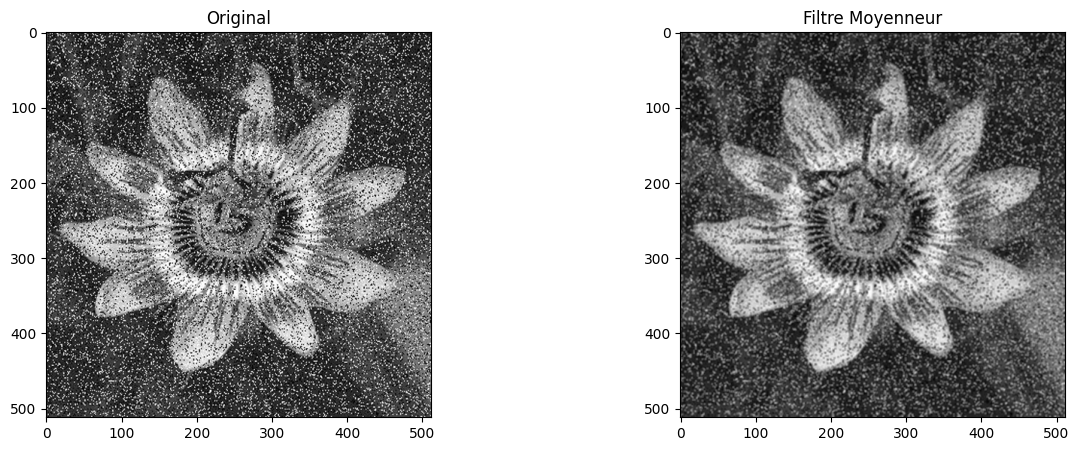

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Chargement de l'image en niveaux de gris
img = cv2.imread(r'image.jpg', cv2.IMREAD_GRAYSCALE)
# Filtre Moyenneur 3x3
kernel = np.ones((3,3),np.float32)/9
img_filtre = cv2.filter2D(img,-1,kernel)
# Affichage de l’image d’origine et de l’image filtrée
plt.figure(figsize=(15,5))
plt.subplot(1,2,1),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(img_filtre, cmap='gray'),plt.title('Filtre Moyenneur')
plt.show()

### 1. Quelle est la principale conséquence du filtre moyenneur sur l’image ?
Le filtre moyenneur (ou filtre de moyenne) lisse l'image, ce qui réduit le bruit et les variations brusques d'intensité. La principale conséquence est une perte de netteté, car le filtre moyenneur remplace chaque pixel par la moyenne des pixels environnants, ce qui a pour effet d'adoucir les transitions de couleurs ou de niveaux de gris. Cela donne un effet de flou, réduisant ainsi les détails fins de l'image.

In [24]:
import numpy as np

def calculate_snr(image):
    signal = np.mean(image)
    noise = np.std(image)
    snr = 10 * np.log10(signal**2 / noise**2)
    return snr

snr_original = calculate_snr(img)
snr_filtre = calculate_snr(img_filtre)

print(f"SNR de l'image originale : {snr_original:.2f}")
print(f"SNR de l'image filtrée : {snr_filtre:.2f}")

SNR de l'image originale : 2.98
SNR de l'image filtrée : 5.42


### Les détails perdus après l'application du filre

On constate une augmentation de la valeur SNR entre l'image originale et celle filtrée 

## 1.2.Filtre Guassien

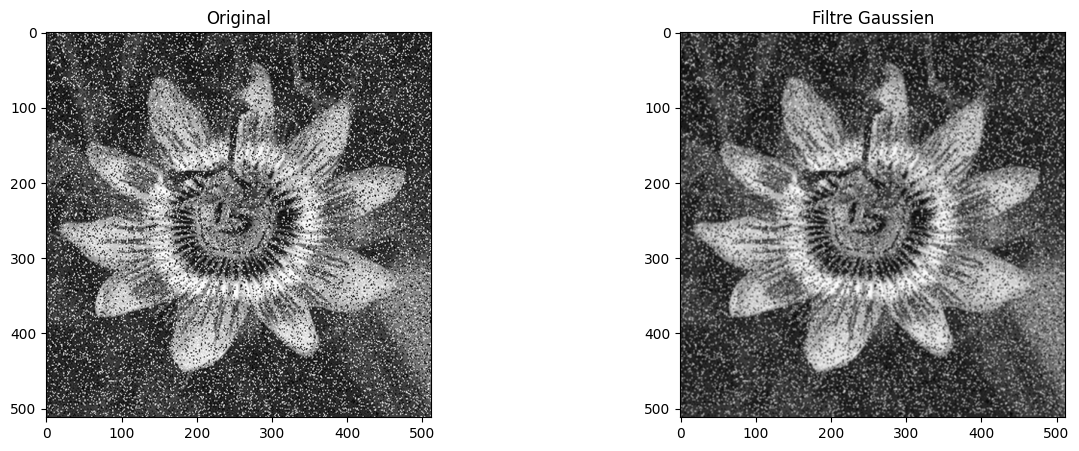

In [25]:
# Filtre Gaussien 3x3
img_gauss = cv2.GaussianBlur(img, (3,3), 0)
plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(img_gauss, cmap='gray'),plt.title('Filtre Gaussien')
plt.show()

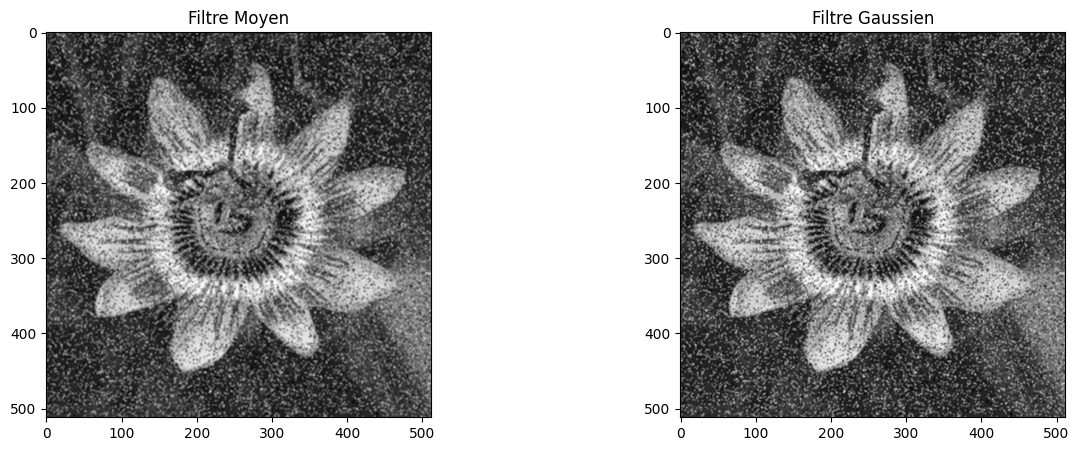

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img_filtre, cmap='gray'),plt.title('Filtre Moyen')
plt.subplot(122),plt.imshow(img_gauss, cmap='gray'),plt.title('Filtre Gaussien')
plt.show()

# 2.Filtrage non linéaire

## 2.1. Filtre médian

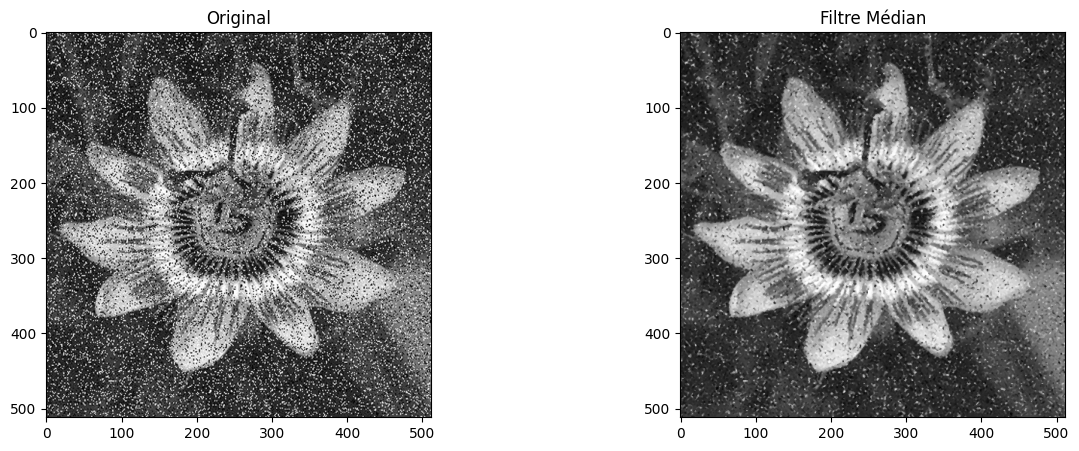

In [28]:
# Filtre M´edian 3x3
img_median = cv2.medianBlur(img, 3)
# Affichage
plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(img_median, cmap='gray'),plt.title('Filtre Médian')
plt.show()

# Comparaison des résultats

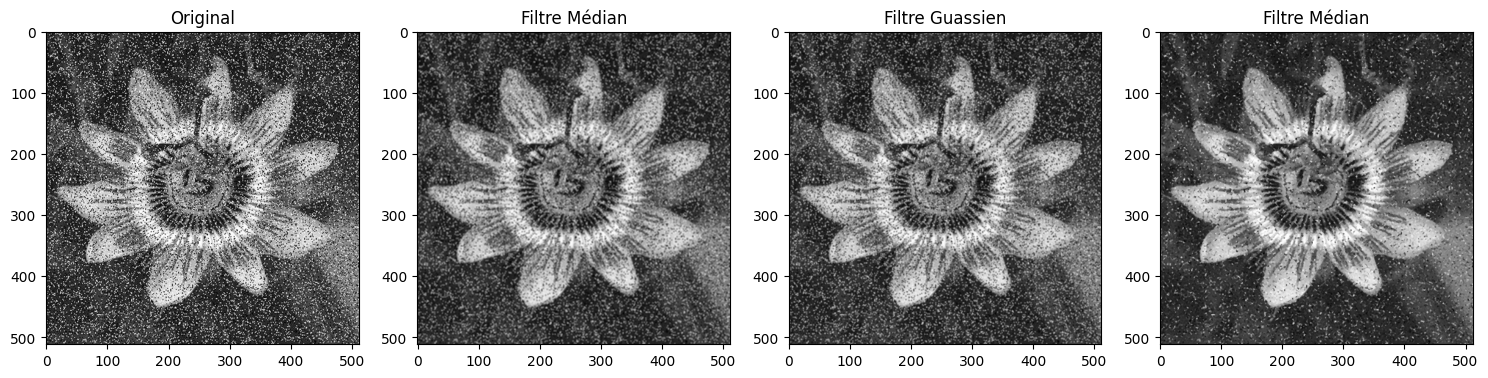

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(141),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(142),plt.imshow(img_filtre, cmap='gray'),plt.title('Filtre Médian')
plt.subplot(143),plt.imshow(img_gauss, cmap='gray'),plt.title('Filtre Guassien')
plt.subplot(144),plt.imshow(img_median, cmap='gray'),plt.title('Filtre Médian')
plt.tight_layout()
plt.show()

In [30]:
snr_original = calculate_snr(img)
snr_filtre = calculate_snr(img_filtre)
snr_gauss = calculate_snr(img_gauss)
snr_médian = calculate_snr(img_median)

print(f"SNR de l'image originale : {snr_original:.2f}")
print(f"SNR de l'image filtrée : {snr_filtre:.2f}")
print(f"SNR de l'image par filtre gaussien : {snr_gauss:.2f}")
print(f"SNR de l'image par filtre médian : {snr_médian:.2f}")

SNR de l'image originale : 2.98
SNR de l'image filtrée : 5.42
SNR de l'image par filtre gaussien : 5.10
SNR de l'image par filtre médian : 4.09


1. SNR de l'image originale : 2.98
L'image originale est bruitée, avec un faible SNR, indiquant que le bruit est relativement important par rapport au signal.

2. SNR de l'image filtrée (Moyenneur) : 5.42
Le filtre moyenneur réduit significativement le bruit (SNR le plus élevé), mais au prix de la perte de détails, notamment des contours nets.

3. SNR de l'image par filtre gaussien : 5.10
Le filtre gaussien réduit le bruit presque autant que le filtre moyenneur, tout en conservant un peu plus de détails.

4. SNR de l'image par filtre médian : 4.09
Le filtre médian est moins efficace pour réduire le bruit (SNR plus bas), mais il préserve mieux les détails et les contours.

# Filtre adaptatif